# Task 2- Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.

# Ashish Kumar

## Importing libraries and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Iris.csv')
data=data.iloc[:,:5]
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


## Data Cleaning

In [3]:
# checking for any null objects in data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


There are no null objects in data frame so no rows need to be deleted

In [4]:
# statistical information about data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Normalizing data over the standard deviation
Now let's normalize the dataset as Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.

In [5]:
from sklearn.preprocessing import StandardScaler
X=data.values[:,1:] # as we don't need id in algorithm
X=StandardScaler().fit_transform(X) 

Now as our data is clean, we will feed it to the algorithm but for that we need the value of k. To find optimum value of k we will use elbow method which is inbuilt in yellowbrick library

## Finding optimum k for k-means

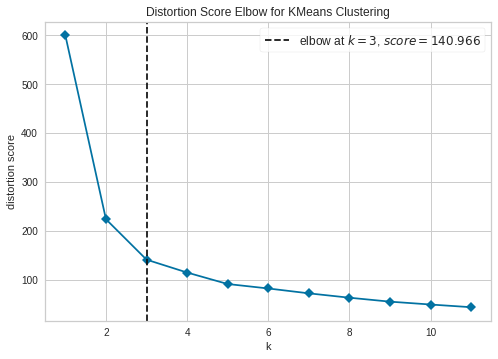

In [6]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,12), timings=False)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

we can see elbow at k=3 so, it means we can split dataset into 3 clusters.

## Creating KMeans classifier

In [7]:
kmeans=KMeans(init='k-means++',n_clusters=3,random_state=0)
kmeans.fit(X)
y=kmeans.predict(X)

In [8]:
data['labels']=kmeans.labels_
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


## Viewing and Plotting Clusters

In [9]:
data[data["labels"]==0]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
50,51,7.0,3.2,4.7,1.4,0
51,52,6.4,3.2,4.5,1.5,0
52,53,6.9,3.1,4.9,1.5,0
56,57,6.3,3.3,4.7,1.6,0
65,66,6.7,3.1,4.4,1.4,0
70,71,5.9,3.2,4.8,1.8,0
75,76,6.6,3.0,4.4,1.4,0
76,77,6.8,2.8,4.8,1.4,0
77,78,6.7,3.0,5.0,1.7,0
85,86,6.0,3.4,4.5,1.6,0


In [10]:
data[data["labels"]==1]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
5,6,5.4,3.9,1.7,0.4,1
6,7,4.6,3.4,1.4,0.3,1
7,8,5.0,3.4,1.5,0.2,1
8,9,4.4,2.9,1.4,0.2,1
9,10,4.9,3.1,1.5,0.1,1


In [11]:
data[data["labels"]==2]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
53,54,5.5,2.3,4.0,1.3,2
54,55,6.5,2.8,4.6,1.5,2
55,56,5.7,2.8,4.5,1.3,2
57,58,4.9,2.4,3.3,1.0,2
58,59,6.6,2.9,4.6,1.3,2
59,60,5.2,2.7,3.9,1.4,2
60,61,5.0,2.0,3.5,1.0,2
61,62,5.9,3.0,4.2,1.5,2
62,63,6.0,2.2,4.0,1.0,2
63,64,6.1,2.9,4.7,1.4,2


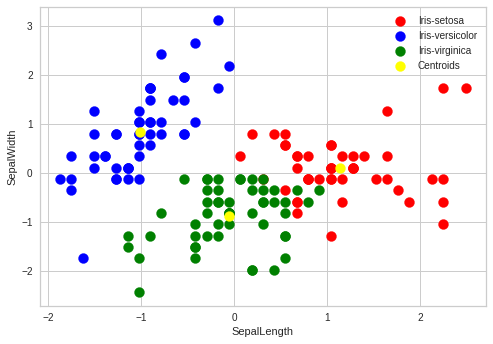

In [12]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y==0, 0], X[y==0, 1],s=100, c='red', label='Iris-setosa')
plt.scatter(X[y==1, 0], X[y==1, 1],s=100, c='blue', label='Iris-versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1],s=100, c='green', label='Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.ylabel('SepalWidth')
plt.xlabel('SepalLength')
plt.legend()

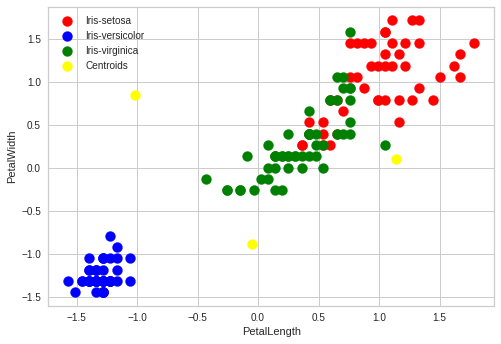

In [13]:
# Visualising the clusters - On the last two columns
plt.scatter(X[y==0, 2], X[y==0, 3],s=100, c='red', label='Iris-setosa')
plt.scatter(X[y==1, 2], X[y==1, 3],s=100, c='blue', label='Iris-versicolor')
plt.scatter(X[y==2, 2], X[y==2, 3],s=100, c='green', label='Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.ylabel('PetalWidth')
plt.xlabel('PetalLength')
plt.legend()